[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Janani\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


C:\Users\Janani\Python\Desktop\Cluster Computing\Assignment
restaurant	i swung in to give them a try but was deeply disappointed	0
restaurant	i had a pretty satisfying experience	1
movie	some applause should be given to the prelude however  	1
product	a must study for anyone interested in the worst sins of industrial design	0
restaurant	the inside is really quite nice and very clean	1
restaurant	they will customize your order any way youd like my usual is eggplant with green bean stir fry love it	1
movie	i wish i could enter negative values admins  	0
restaurant	best fish ive ever had in my life	1
product	it is simple to use and i like it	1
product	restored my phone to like new performance	1
movie	not easy to watch  	0
movie	the script is bad very bad it contains both cheesiness and unethical joke that you normally see in rated r or nc17 movie  	0
restaurant	i will not be eating there again	0
restaurant	what i really like there is the crepe station	1
restaurant	i paid the bill but did 

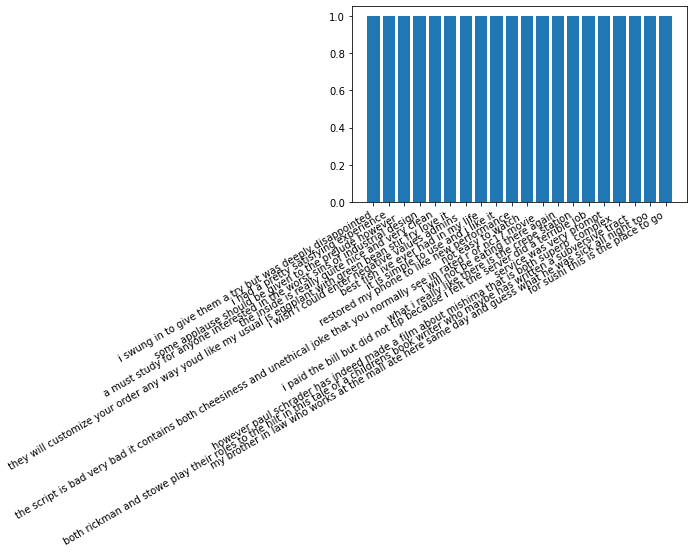

In [36]:
import string
from collections import Counter
import os
import io
import re
import numpy as np
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

b= os.chdir(r'C:\Users\Janani\Python\Desktop\Cluster Computing\Assignment')
print(os.getcwd())  

### Function has been defined to get the positive score value for each review
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    return score['pos']

### function has been defined to clean the input file -lines
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    ##text = re.sub('\w*\d\w*', '', text)
    return text
        
items_list =[]  
revs_list =[]
sentiment_reviews_list = []
sentiment_score_list=[]

with open('Basic_File.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        clear_line = clean_text(clear_line)
        #print(clear_line)        
        items,revs,sent = clear_line.split("\t")
        items_list.append(items)
        revs_list.append(revs)
        sentiment_score_list.append(int(sent))

        for i in revs_list:
            a=sentiment_analyse(i)
            sentiment_reviews_list.append(str(a))

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()